In [1]:
#import hyeonjun_cresnet
import sys

sys.path.insert(0,'../../data/Images/')
sys.path.insert(0,'../../data/hyeon/')
sys.path.insert(0,'../../data/hyeon_model_save/')
sys.path.insert(0,'../../data/006958-master/')
sys.path.insert(0,'../../data/knj/')
sys.path.insert(0,'../../data/sw/')
sys.path.insert(0,'../../data/Images/test/')

from keras import Input
from keras import optimizers, initializers, regularizers, metrics
import math
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as plticker

Using TensorFlow backend.


In [2]:
master_dir = '/data/hyeon/save_files/kaggle1/'


In [3]:
base_dir='/data/Images/Kaggle/cats_and_dogs/'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
print(train_dir)
print(val_dir)
print(test_dir)

/data/Images/Kaggle/cats_and_dogs/train
/data/Images/Kaggle/cats_and_dogs/validation
/data/Images/Kaggle/cats_and_dogs/test


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

 
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=50,
                                                    target_size=(224, 224), 
                                                    color_mode='rgb')

val_generator = val_datagen.flow_from_directory(val_dir, 
                                                batch_size=50,
                                                target_size=(224, 224), 
                                                color_mode='rgb')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  batch_size = 50,
                                                  target_size=(224, 224),
                                                  color_mode='rgb')



Found 1000 images belonging to 2 classes.


In [6]:
'''
layer_list =[
    
        [[4,[4,4,4,4],1],True],
        [[4,[2,2,2,2],2],True],
        [[4,[1,1,1,1],4],True],
        
        [[4,[6,6,6,6],1],False],
        [[4,[3,3,3,3],2],False],
        [[4,[2,2,2,2],3],True],
              
        [[4,[8,8,8,8],1],False],
        [[4,[4,4,4,4],2],False],
        [[4,[2,2,2,2],4],True],
        
        [[4,[3,3,6,3],2],True],
        [[4,[2,2,4,2],3],True],
        
        [[4,[4,4,6,4],2],True],
        [[4,[2,2,3,2],4],True],
    
        [[4,[3,4,6,3],2],True]
]

'''


layer_list =[
    
        [[4,[4,4,4,4],1],True],
]



In [9]:
model_list = []
history_list = []
import hyeonjun_cresnet123

In [12]:

model_list = [hyeonjun_cresnet123.resnet((224,224,3), x[0], num_classes=2, isNumFilers=x[1]) for x in layer_list]


Tensor("input_1:0", shape=(?, 224, 224, 3), dtype=float32)
Tensor("activation_1/Relu:0", shape=(?, 112, 112, 64), dtype=float32)
Tensor("max_pooling2d_1/MaxPool:0", shape=(?, 56, 56, 64), dtype=float32)
----------------
----------------
2::64X64,1 : Tensor("batch_normalization_2/cond/Merge:0", shape=(?, 56, 56, 64), dtype=float32)
Tensor("max_pooling2d_1/MaxPool:0", shape=(?, 56, 56, 64), dtype=float32)
Tensor("add_1/add:0", shape=(?, 56, 56, 64), dtype=float32)
Tensor("activation_2/Relu:0", shape=(?, 56, 56, 64), dtype=float32)
----------------
3::64X64,1 : Tensor("batch_normalization_3/cond/Merge:0", shape=(?, 56, 56, 64), dtype=float32)
Tensor("activation_2/Relu:0", shape=(?, 56, 56, 64), dtype=float32)
Tensor("add_2/add:0", shape=(?, 56, 56, 64), dtype=float32)
Tensor("activation_3/Relu:0", shape=(?, 56, 56, 64), dtype=float32)
----------------
4::64X64,1 : Tensor("batch_normalization_4/cond/Merge:0", shape=(?, 56, 56, 64), dtype=float32)
Tensor("activation_3/Relu:0", shape=(?, 56,

In [13]:
history_list = []

for model in model_list:
    base_dir = f"{master_dir}checkpoint/{model[1]}_{model[2]}_checkpoint.h5"
    check_dir = os.path.dirname(base_dir)
    check_file = os.path.basename(base_dir)
    full_path = os.path.join(check_dir, check_file)

    try:
        os.makedirs(check_dir)
    except:
        if not os.path.isdir(check_dir):
            raise
    
    checkpoint = ModelCheckpoint(filepath=full_path, 
            monitor='val_loss', 
            mode='min', 
            save_best_only=True)


    earlystopping = EarlyStopping(monitor='val_loss',
                              mode='auto',
                              patience=10)
    

    model[0].compile(loss='categorical_crossentropy', 
                     optimizer=optimizers.RMSprop(lr=5e-5), 
                     metrics=['acc'])


    history_list.append(model[0].fit_generator(train_generator, 
                steps_per_epoch=math.ceil(train_generator.n / train_generator.batch_size), 
                epochs=200, 
                validation_data= val_generator, 
                validation_steps=math.ceil(val_generator.n / val_generator.batch_size), 
                callbacks=[checkpoint, earlystopping]))


Epoch 1/200
40/40 [==============================] - 20s 512ms/step - loss: 1.5612 - acc: 0.5765 - val_loss: 1.4135 - val_acc: 0.6410
Epoch 2/200
40/40 [==============================] - 10s 260ms/step - loss: 1.2933 - acc: 0.7530 - val_loss: 1.7474 - val_acc: 0.5250
Epoch 3/200
40/40 [==============================] - 9s 233ms/step - loss: 1.1633 - acc: 0.8450 - val_loss: 2.9058 - val_acc: 0.5000
Epoch 4/200
40/40 [==============================] - 10s 244ms/step - loss: 0.9925 - acc: 0.9300 - val_loss: 1.5481 - val_acc: 0.6770
Epoch 5/200
40/40 [==============================] - 9s 237ms/step - loss: 0.8705 - acc: 0.9745 - val_loss: 1.8077 - val_acc: 0.6470
Epoch 6/200
40/40 [==============================] - 9s 224ms/step - loss: 0.8394 - acc: 0.9815 - val_loss: 7.1032 - val_acc: 0.5000
Epoch 7/200
40/40 [==============================] - 8s 202ms/step - loss: 0.8014 - acc: 0.9915 - val_loss: 2.9626 - val_acc: 0.6120
Epoch 8/200
40/40 [==============================] - 8s 195ms/step

/data/hyeon/save_files/kaggle1/summary/18_[4, [4, 4, 4, 4], 1]_summary.txt
/data/hyeon/save_files/kaggle1/result_image/18_[4, [4, 4, 4, 4], 1]_image.png


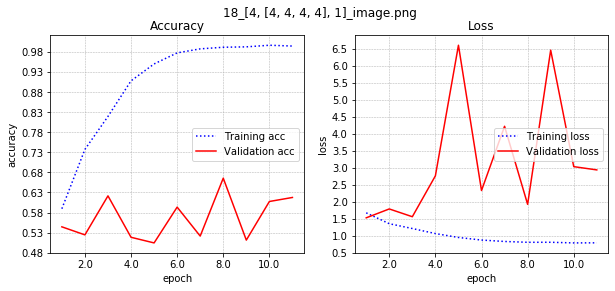

/data/hyeon/save_files/kaggle1/model/18_[4, [4, 4, 4, 4], 1]_model.json
/data/hyeon/save_files/kaggle1/weight/18_[4, [4, 4, 4, 4], 1]_weight.h5
/data/hyeon/save_files/kaggle1/history/_history.txt
[18_[4, [4, 4, 4, 4], 1]] 	 57.60%


In [15]:
import hyeonjun_cresnet123
hyeonjun_cresnet.save_model_summary_list(model_list, master_dir)
hyeonjun_cresnet.save_result_image_list(model_list, history_list, master_dir)
hyeonjun_cresnet.save_model_list(model_list, master_dir)
hyeonjun_cresnet.save_weight_list(model_list, master_dir)
hyeonjun_cresnet.save_history(model_list, history_list, master_dir)
hyeonjun_cresnet.model_evaluate(model_list, test_generator, master_dir)